In [81]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.linear_model import LinearRegression
import numpy as np

In [82]:
#load daatset (taken from understat)
df = pd.read_csv('/Users/calvi/Downloads/prem-wk31.csv')

In [83]:
df.head()

,1,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,Team_Color
0,2.0,Arsenal,31,22,5,4,75,24,71,67.01-7.99,24.80+0.80,66.01-4.99,#EF0107
1,3.0,Liverpool,31,21,8,2,72,30,71,75.73+3.73,37.13+7.13,63.32-7.68,#C8102E
2,4.0,Manchester City,31,21,7,3,71,31,70,69.37-1.63,31.15+0.15,66.54-3.46,#6CABDD
3,5.0,Tottenham,31,18,6,7,65,45,60,59.52-5.48,53.57+8.57,47.88-12.12,#132257
4,6.0,Aston Villa,32,18,6,8,66,49,60,59.87-6.13,52.80+3.80,50.05-9.95,#95BFE5


In [84]:
#clearing everything uneccessary for xGA xG after +- using re
def clean_numeric(s):
    return re.sub(r'([+-]?\d+\.\d+)([+-]?\d+\.\d+)?(?=[+-]|\b)', lambda x: x.group(1), s)
columns_to_clean = ['xG', 'xGA','xPTS']
df[columns_to_clean] = df[columns_to_clean].apply(lambda x: x.map(clean_numeric))
print(df)

       1                     Team   M   W   D   L   G  GA  PTS     xG    xGA  \
0    2.0                  Arsenal  31  22   5   4  75  24   71  67.01  24.80   
1    3.0                Liverpool  31  21   8   2  72  30   71  75.73  37.13   
2    4.0          Manchester City  31  21   7   3  71  31   70  69.37  31.15   
3    5.0                Tottenham  31  18   6   7  65  45   60  59.52  53.57   
4    6.0              Aston Villa  32  18   6   8  66  49   60  59.87  52.80   
5    7.0        Manchester United  31  15   4  12  45  46   49  48.84  61.23   
6    8.0                 West Ham  32  13   9  10  52  56   48  46.09  61.11   
7    9.0         Newcastle United  31  14   5  12  65  52   47  65.21  52.06   
8   10.0                  Chelsea  30  12   8  10  55  52   44  62.35  49.38   
9   11.0                 Brighton  31  11  10  10  51  49   43  51.24  49.63   
10  12.0  Wolverhampton Wanderers  31  12   6  13  44  49   42  44.77  56.67   
11  13.0              Bournemouth  31  1

In [85]:
# Convert columns to numeric types
df["xG"] = pd.to_numeric(df["xG"], errors='coerce')
df["xGA"] = pd.to_numeric(df["xGA"], errors='coerce')
df["G"] = pd.to_numeric(df["G"], errors='coerce')
df["GA"] = pd.to_numeric(df["GA"], errors='coerce')

In [86]:
df.head()

,1,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,Team_Color
0,2.0,Arsenal,31,22,5,4,75,24,71,67.01,24.80,66.01,#EF0107
1,3.0,Liverpool,31,21,8,2,72,30,71,75.73,37.13,63.32,#C8102E
2,4.0,Manchester City,31,21,7,3,71,31,70,69.37,31.15,66.54,#6CABDD
3,5.0,Tottenham,31,18,6,7,65,45,60,59.52,53.57,47.88,#132257
4,6.0,Aston Villa,32,18,6,8,66,49,60,59.87,52.80,50.05,#95BFE5


In [123]:
#make new column for diff between expected and actual goals/ goals against.
df['xG_Diff'] = df['G'] - df['xG']
df['xGA_Diff'] = df['xGA'] - df['GA']

In [88]:
#get GD and xGD
df['GD'] = df['G']-df['GA']
df['xGD'] = df['xG']-df['xGA']

In [89]:
df.head()

,1,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,Team_Color,xG_Diff,xGA_Diff,GD,xGD
0,2.0,Arsenal,31,22,5,4,75,24,71,67.01,24.80,66.01,#EF0107,7.99,-0.80,51,42.21
1,3.0,Liverpool,31,21,8,2,72,30,71,75.73,37.13,63.32,#C8102E,-3.73,-7.13,42,38.60
2,4.0,Manchester City,31,21,7,3,71,31,70,69.37,31.15,66.54,#6CABDD,1.63,-0.15,40,38.22
3,5.0,Tottenham,31,18,6,7,65,45,60,59.52,53.57,47.88,#132257,5.48,-8.57,20,5.95
4,6.0,Aston Villa,32,18,6,8,66,49,60,59.87,52.80,50.05,#95BFE5,6.13,-3.80,17,7.07


In [90]:
#we only need a few columns so we can drop everything else
df = df.drop(['1', 'M', 'W', 'D', 'L'], axis=1)

In [91]:
#gonna add team badges for plot readability then we can start plotting as well as changing some names so logo appears
df['Team'] = df['Team'].replace('Luton', 'luton town')
df['Team'] = df['Team'].replace('sheffield utd','Sheffield United')
df['badge'] = df['Team'].apply(
    lambda x: f"/Users/calvi/Downloads/football-logos-master/logos/GB1/{x.lower().replace('é', 'e').replace('á', 'a').replace('í', 'i')}.png"
)
df

,Team,G,GA,PTS,xG,xGA,xPTS,Team_Color,xG_Diff,xGA_Diff,GD,xGD,badge
0,Arsenal,75,24,71,67.01,24.80,66.01,#EF0107,7.99,-0.80,51,42.21,/Users/calvi/Downloads/football-logos-master/l...
1,Liverpool,72,30,71,75.73,37.13,63.32,#C8102E,-3.73,-7.13,42,38.60,/Users/calvi/Downloads/football-logos-master/l...
2,Manchester City,71,31,70,69.37,31.15,66.54,#6CABDD,1.63,-0.15,40,38.22,/Users/calvi/Downloads/football-logos-master/l...
3,Tottenham,65,45,60,59.52,53.57,47.88,#132257,5.48,-8.57,20,5.95,/Users/calvi/Downloads/football-logos-master/l...
4,Aston Villa,66,49,60,59.87,52.80,50.05,#95BFE5,6.13,-3.80,17,7.07,/Users/calvi/Downloads/football-logos-master/l...
5,Manchester United,45,46,49,48.84,61.23,36.72,#DA291C,-3.84,-15.23,-1,-12.39,/Users/calvi/Downloads/football-logos-master/l...
6,West Ham,52,56,48,46.09,61.11,37.20,#7A263A,5.91,-5.11,-4,-15.02,/Users/calvi/Downloads/football-logos-master/l...
7,Newcastle United,65,52,47,65.21,52.06,51.14,#241F20,-0.21,-0.06,13,13.15,/Users/calvi/Downloads/football-logos-master/l...
8,Chelsea,55,52,44,62.35,49.38,50.00,#034694,-7.35,2.62,3,12.97,/Users/calvi/Downloads/football-logos-master/l...
9,Brighton,51,49,43,51.24,49.63,45.52,#0057B8,-0.24,-0.63,2,1.61,/Users/calvi/Downloads/football-logos-master/l...


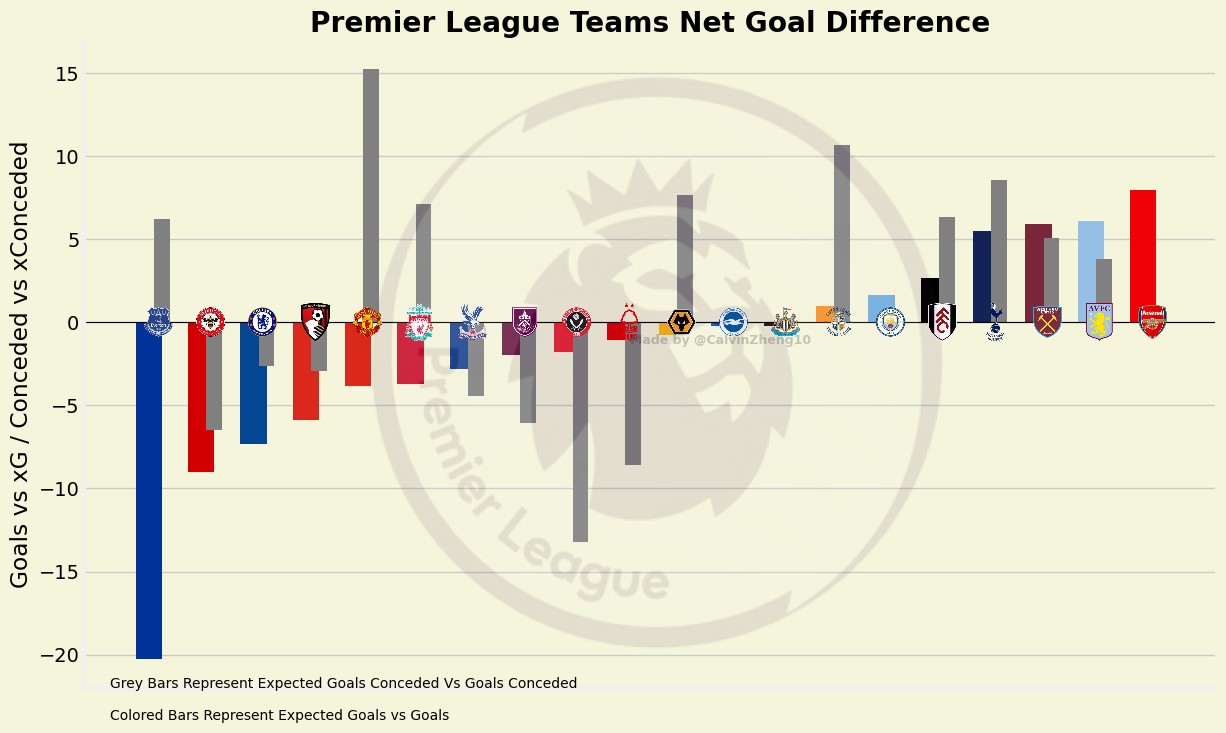

In [160]:
#creating plot style and bg color
fig, ax = plt.subplots(figsize=(13,8))
plt.style.use('fivethirtyeight')
fig.set_facecolor('#F5F5DC')
ax.patch.set_facecolor('#F5F5DC')

#sorted it by 2 xG Diff and xGA diff 
sort = df.sort_values(by = 'xG_Diff').reset_index()
bars = ax.bar(sort.index, sort['xG_Diff'], color=sort['Team_Color'], width = 0.5)

sort = df.sort_values(by = 'xG_Diff').reset_index()
bars = ax.bar(sort.index + .25, sort['xGA_Diff'], color='Grey', width = 0.3)

ax.spines[['right', 'top']].set_visible(False)

#function to read logos
def add_logo(ax, path, xy):
    image = plt.imread(path)
    imagebox = OffsetImage(image, zoom=0.15)
    ab = AnnotationBbox(imagebox, xy, frameon=False, pad=0)
    ax.add_artist(ab)
    
#put in the badge logos for teams
for i, bar in enumerate(bars):
    add_logo(ax, sort['badge'].iloc[i], (bar.get_x() + bar.get_width() / 4, 0))
    
logo_path = '/Users/calvi/Downloads/Prem_Logo-removebg-preview.png'  # Replace with the path to your logo image
logo = plt.imread(logo_path)
imagebox = OffsetImage(logo, zoom=1.2, alpha=0.1)
ab = AnnotationBbox(imagebox, (0.5, 0.5), xycoords='axes fraction', boxcoords="axes fraction", frameon=False)
ax.add_artist(ab)
#created line and labels    
plt.axhline(0, color='black', linewidth=.8)
plt.ylabel('Goals vs xG / Conceded vs xConceded')
plt.xticks([], [])
plt.title('Premier League Teams Net Goal Difference',weight = 'bold')
# Add title and footnotes
plt.figtext(0.1, 0.05, 'Grey Bars Represent Expected Goals Conceded Vs Goals Conceded\n', horizontalalignment='left', fontsize=10)
plt.figtext(.1,.03, 'Colored Bars Represent Expected Goals vs Goals', horizontalalignment='left', fontsize=10)
plt.figtext(0.5, 0.5, 'Made by @CalvinZheng10', horizontalalignment='left', fontsize=9, fontweight = 'bold', alpha = .2)

plt.show()